## Importing The Library

In [ ]:
import numpy as np
import pandas as pd

## Importing The Dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets download -d adityadesai13/used-car-dataset-ford-and-mercedes

  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 143MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  used-car-dataset-ford-and-mercedes.zip
  inflating: audi.csv                
  inflating: bmw.csv                 
  inflating: cclass.csv              
  inflating: focus.csv               
  inflating: ford.csv                
  inflating: hyundi.csv              
  inflating: merc.csv                
  inflating: skoda.csv               
  inflating: toyota.csv              
  inflating: unclean cclass.csv      
  inflating: unclean focus.csv       
  inflating: vauxhall.csv            
  inflating: vw.csv                  


In [ ]:
df_audi = pd.read_csv("audi.csv")
df_audi["brand"] = "Audi"

df_bmw = pd.read_csv("bmw.csv")
df_bmw["brand"] = "BMW"

df_ford = pd.read_csv("ford.csv")
df_ford["brand"] = "Ford"

df_hyundai = pd.read_csv("hyundi.csv")
df_hyundai["brand"] = "Hyundai"
df_hyundai["tax"] = df_hyundai["tax(£)"] * 1.07

df_merc = pd.read_csv("merc.csv")
df_merc["brand"] = "Mercedes"

df_toyota = pd.read_csv("toyota.csv")
df_toyota["brand"] = "Toyota"

df_vw = pd.read_csv("vw.csv")
df_vw["brand"] = "VW"

In [ ]:
print("Models on Audi Car Brand")
print(df_audi.model.unique())

print("Models on BMW Car Brand")
print(df_bmw.model.unique())

print("Models on Ford Car Brand")
print(df_ford.model.unique())

print("Models on Hyundai Car Brand")
print(df_hyundai.model.unique())

print("Models on Mercedes Car Brand")
print(df_merc.model.unique())

print("Models on Toyota Car Brand")
print(df_toyota.model.unique())

print("Models on VW Car Brand")
print(df_vw.model.unique())

Models on Audi Car Brand
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
Models on BMW Car Brand
[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
Models on Ford Car Brand
[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']
Models on Hyundai Car Brand
[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica']
Models on Mercedes Car Brand
[' SLK' ' S Class' ' SL CLASS' ' G Class' ' GLE Class' ' GLA Class'
 ' A Class' ' B Class' 

## Data Preprocessing

In [ ]:
# Concatenating imported dataframes
df = pd.concat([df_audi, df_bmw, df_ford, df_hyundai, df_merc, df_toyota, df_vw])

In [ ]:
# Dropping unnecessary columns
df = df.drop(columns=["tax(£)"])

In [ ]:
df["car_model"] = df["brand"] + "" + df["model"]

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,car_model
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi,Audi A1
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi,Audi A6
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi,Audi A1
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi,Audi A4
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi,Audi A3
...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,VW,VW Eos
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,VW,VW Fox
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,VW,VW Fox
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,VW,VW Fox


In [ ]:
df.to_csv('cleaned_df.csv')

In [ ]:
df = df.drop(columns=["brand", "model"])

In [ ]:
# One Hot Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

df["car_model"] = le.fit_transform(df["car_model"])
le_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_map)

df["year"] = le.fit_transform(df["year"])
le_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_map)

df["transmission"] = le.fit_transform(df["transmission"])
le_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_map)

df["fuelType"] = le.fit_transform(df["fuelType"])
le_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_map)

{'Audi A1': 0, 'Audi A2': 1, 'Audi A3': 2, 'Audi A4': 3, 'Audi A5': 4, 'Audi A6': 5, 'Audi A7': 6, 'Audi A8': 7, 'Audi Q2': 8, 'Audi Q3': 9, 'Audi Q5': 10, 'Audi Q7': 11, 'Audi Q8': 12, 'Audi R8': 13, 'Audi RS3': 14, 'Audi RS4': 15, 'Audi RS5': 16, 'Audi RS6': 17, 'Audi RS7': 18, 'Audi S3': 19, 'Audi S4': 20, 'Audi S5': 21, 'Audi S8': 22, 'Audi SQ5': 23, 'Audi SQ7': 24, 'Audi TT': 25, 'BMW 1 Series': 26, 'BMW 2 Series': 27, 'BMW 3 Series': 28, 'BMW 4 Series': 29, 'BMW 5 Series': 30, 'BMW 6 Series': 31, 'BMW 7 Series': 32, 'BMW 8 Series': 33, 'BMW M2': 34, 'BMW M3': 35, 'BMW M4': 36, 'BMW M5': 37, 'BMW M6': 38, 'BMW X1': 39, 'BMW X2': 40, 'BMW X3': 41, 'BMW X4': 42, 'BMW X5': 43, 'BMW X6': 44, 'BMW X7': 45, 'BMW Z3': 46, 'BMW Z4': 47, 'BMW i3': 48, 'BMW i8': 49, 'Ford B-MAX': 50, 'Ford C-MAX': 51, 'Ford EcoSport': 52, 'Ford Edge': 53, 'Ford Escort': 54, 'Ford Fiesta': 55, 'Ford Focus': 56, 'Ford Fusion': 57, 'Ford Galaxy': 58, 'Ford Grand C-MAX': 59, 'Ford Grand Tourneo Connect': 60, 'F

In [ ]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_model
0,22,12500,1,15735,4,150.0,55.4,1.4,0
1,21,16500,0,36203,0,20.0,64.2,2.0,5
2,21,11000,1,29946,4,30.0,55.4,1.4,0
3,22,16800,0,25952,0,145.0,67.3,2.0,3
4,24,17300,1,1998,4,145.0,49.6,1.0,2


## Modeling and Validating

In [ ]:
X = df.drop(columns="price")
y = df["price"]

In [ ]:
!pip install xgboost==1.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 68 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# Hyperparameter Tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'tree_method': ['gpu_hist'],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X, y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: ignored

In [ ]:
#Cross-Validation
model = XGBRegressor()

scoring = {'MSE': make_scorer(mean_squared_error),
          'MAE': make_scorer(mean_absolute_error)}

kfold = KFold(n_splits=5, random_state=1234, shuffle=True)

results_reg = cross_validate(estimator=model, 
                             X=X, 
                             y=y, 
                             cv=kfold, 
                             scoring=scoring)

results_reg

{'fit_time': array([3.97329855, 3.95169401, 3.88341951, 3.86527896, 3.87578201]),
 'score_time': array([0.03242588, 0.03188968, 0.0321188 , 0.03239894, 0.03212047]),
 'test_MAE': array([1313.72266113, 1300.59080982, 1300.94411564, 1310.69620708,
        1315.86751542]),
 'test_MSE': array([3994382.87388888, 3981895.83219243, 4944780.67451145,
        5192696.79647557, 4396648.94395278])}

In [ ]:
b_lin = np.sqrt(results_reg.get('test_MSE'))
print('mean_RMSE: ', "%.15f" % (b_lin.mean()))

mean_RMSE :  2118.663610535661974


In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

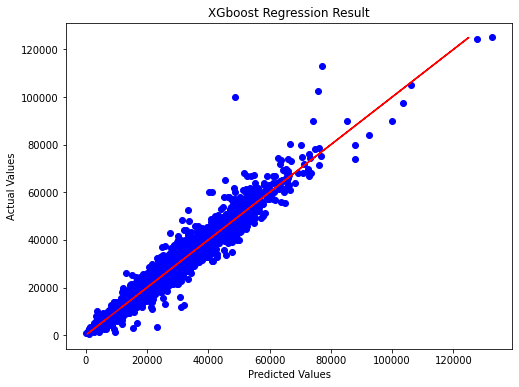

In [ ]:
# Comparing the prediction results and its actual values
fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(y_predict, y_test, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('XGboost Regression Result')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Saving Model

In [ ]:
import joblib
joblib.dump(value=model, filename="model_lr.pkl")

['model_lr.pkl']